# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

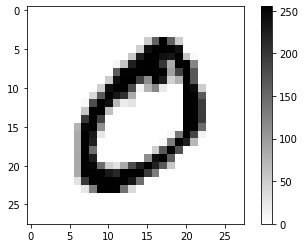

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

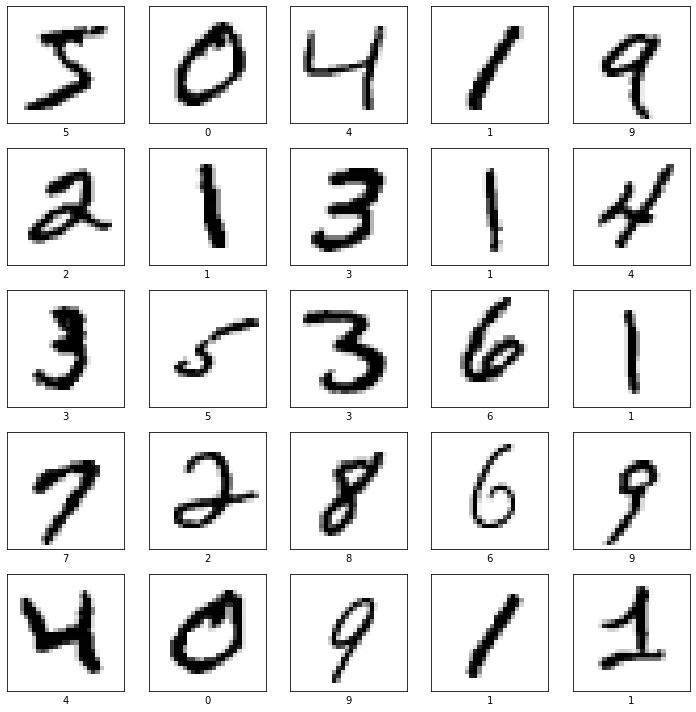

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [8]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [10]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [13]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [14]:
nfeatures = x_train.shape[1]
nfeatures

784

In [15]:
clear_session()

model = Sequential(Dense(   , input_shape = (nfeatures,), activation = ))

model.summary()

SyntaxError: ignored

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=  )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

* 학습결과 그래프

In [16]:
dl_history_plot(history)

NameError: ignored

* 예측 및 평가

In [ ]:
pred = model.predict(x_test)
pred_1 = pred.   (axis=1)

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3014 - val_loss: 2.3021
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3011 - val_loss: 2.3021
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3011 - val_loss: 2.3022
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3010 - val_loss: 2.3019
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3009 - val_loss: 2.3021
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3008 - val_loss: 2.3016
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3005 - val_loss: 2.3012
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3000 - val_loss: 2.3007
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2991 - val_loss: 2.3000
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.297

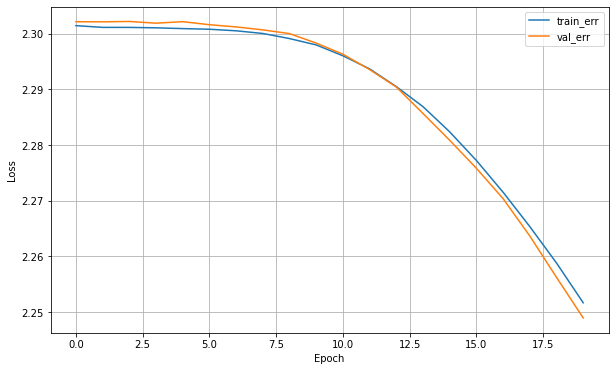

[[161   0   1   1   6   0 417   0   1 393]
 [  3 942   0 109   0   0  81   0   0   0]
 [ 93  10   0 158  59   0 649   0   0  63]
 [114   6   0  62  16   0 809   0   1   2]
 [ 66   8   0  11 198   0 169   0   0 530]
 [ 88   2   0  67  68   0 626   0   0  41]
 [ 15   2   0  14   5   0 824   0   0  98]
 [ 73 239   0  20 357   0 103  12   0 224]
 [ 29   1   1 132  45   0 732   0   0  34]
 [ 31  51   0   6 138   0 228   0   1 554]]
              precision    recall  f1-score   support

           0       0.24      0.16      0.19       980
           1       0.75      0.83      0.79      1135
           2       0.00      0.00      0.00      1032
           3       0.11      0.06      0.08      1010
           4       0.22      0.20      0.21       982
           5       0.00      0.00      0.00       892
           6       0.18      0.86      0.29       958
           7       1.00      0.01      0.02      1028
           8       0.00      0.00      0.00       974
           9       0.29     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
clear_session()

model1 = Sequential([Dense( 20, input_shape = (nfeatures,), activation = 'relu'),
                     Dense(10, activation = 'softmax')
])
                          
model1.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy'  )


history = model1.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

pred_1 = model1.predict(x_test)
pred_1 = pred_1.argmax(axis=1)

dl_history_plot(history)

print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

### (2) 모델2

In [32]:
clear_session()

model3 = Sequential([Dense(128, input_shape = (nfeatures,), activation = 'relu'),
                     Dense(64, activation = 'relu'),
                     Dense(10, activation = 'softmax')
])
                          
model3.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy'  )

In [33]:
hist = model3.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3015 - val_loss: 2.3019
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3011 - val_loss: 2.3025
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3008 - val_loss: 2.3011
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2975 - val_loss: 2.2913
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2553 - val_loss: 2.2216
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.1136 - val_loss: 2.0597
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9877 - val_loss: 1.9426
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.9169 - val_loss: 1.9083
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.8745 - val_loss: 1.8865
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.846

In [34]:

pred_3 = model3.predict(x_val)
pred_3 = pred_3.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


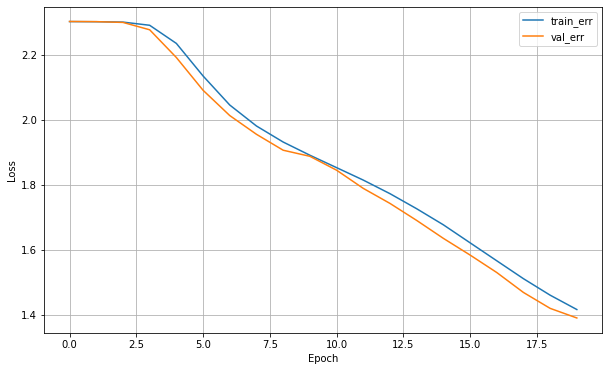

[[   3  876   11   37    1    0    0   38   14    0]
 [   0 1134    0    0    0    0    0    0    1    0]
 [   0  997    7   11    1    0    0    7    9    0]
 [   5  938    1   25    2    2    2   24   10    1]
 [   4  861    1    7    7   10    2   59   28    3]
 [  37  622    5   67   12    5    0   42  101    1]
 [   1  943    1    5    0    0    0    7    1    0]
 [   1  936    6   15    0    0    1   60    7    2]
 [  12  818    9   25    5    8    0    9   86    2]
 [   1  970    1   11    1    0    0   19    4    2]]
              precision    recall  f1-score   support

           0       0.05      0.00      0.01       980
           1       0.12      1.00      0.22      1135
           2       0.17      0.01      0.01      1032
           3       0.12      0.02      0.04      1010
           4       0.24      0.01      0.01       982
           5       0.20      0.01      0.01       892
           6       0.00      0.00      0.00       958
           7       0.23      0.06   

In [36]:

dl_history_plot(history)

print(confusion_matrix(y_val, pred_3))
print(classification_report(y_val, pred_3))

In [24]:

hist = model2.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3014 - val_loss: 2.3019
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3012 - val_loss: 2.3021
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3011 - val_loss: 2.3020
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - val_loss: 2.3022
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3011 - val_loss: 2.3021
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - val_loss: 2.3016
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3006 - val_loss: 2.3017
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2995 - val_loss: 2.2990
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2953 - val_loss: 2.2917
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.282

In [28]:

pred_2 = model2.predict(x_val)
pred_2 = pred_2.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


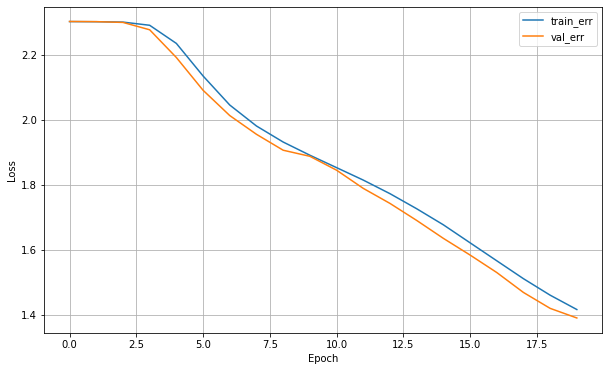

[[ 65 326  34  86 234   2   8 105   1 119]
 [  4  13  80 635  22  60   1 275  38   7]
 [ 14 169  51 188 161  19   9 331   5  85]
 [ 23 230  30 259  88  35  13 222   5 105]
 [ 55 202   5 311 180  10  15 183   5  16]
 [ 48 230  45 191 105  47  15 104  21  86]
 [  3 162  82 100 414   5  17 136   1  38]
 [  8  46   7 429  85  17  20 409   3   4]
 [ 71 259  28 335  79  11  12  95   4  80]
 [ 46 110   4 306 236  14  21 255   0  17]]
              precision    recall  f1-score   support

           0       0.19      0.07      0.10       980
           1       0.01      0.01      0.01      1135
           2       0.14      0.05      0.07      1032
           3       0.09      0.26      0.13      1010
           4       0.11      0.18      0.14       982
           5       0.21      0.05      0.08       892
           6       0.13      0.02      0.03       958
           7       0.19      0.40      0.26      1028
           8       0.05      0.00      0.01       974
           9       0.03     

In [29]:

dl_history_plot(history)

print(confusion_matrix(y_val, pred_2))
print(classification_report(y_val, pred_2))